# Qubit gate decompositions of fermionic gates

In this page, we discuss the gate decompositions of the fermionic gates included in ffsim.

The following code cell constructs and draws an example circuit that uses some of the gates in ffsim. In the circuit drawing, the gates appear as opaque boxes. In the rest of this page, we'll see how these gates decompose into more basic gates.

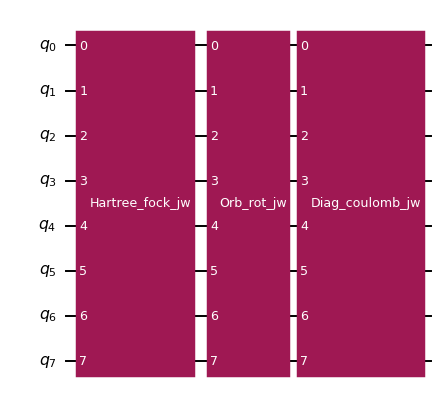

In [1]:
import numpy as np
from qiskit.circuit import QuantumCircuit, QuantumRegister

import ffsim

# Let's use 4 spatial orbitals with 2 alpha electrons and 2 beta electrons.
norb = 4
nelec = (2, 2)

# Initialize qubits
qubits = QuantumRegister(2 * norb, name="q")

# Initialize random number generator
rng = np.random.default_rng(1234)

# Generate some random data
orbital_rotation = ffsim.random.random_unitary(norb, seed=rng)
diag_coulomb_mat = ffsim.random.random_real_symmetric_matrix(norb, seed=rng)

# Create an example circuit
circuit = QuantumCircuit(qubits)
circuit.append(ffsim.qiskit.PrepareHartreeFockJW(norb, nelec), qubits)
circuit.append(ffsim.qiskit.OrbitalRotationJW(norb, orbital_rotation), qubits)
circuit.append(
    ffsim.qiskit.DiagCoulombEvolutionJW(norb, diag_coulomb_mat, time=1.0), qubits
)

# Draw the circuit
circuit.draw("mpl", scale=0.7)

## Hartree-Fock and Slater determinant preparation

Let's create a circuit with a Hartree-Fock state preparation gate, [PrepareHartreeFockJW](../api/ffsim.qiskit.rst#ffsim.qiskit.PrepareHartreeFockJW). Then, let's decompose the circuit once and draw the output.

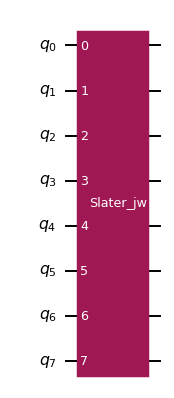

In [2]:
circuit = QuantumCircuit(qubits)
circuit.append(ffsim.qiskit.PrepareHartreeFockJW(norb, nelec), qubits)

circuit.decompose().draw("mpl", scale=0.7)

The Hartree-Fock preparation gate has decomposed into a Slater determinant preparation gate, [PrepareSlaterDeterminantJW](../api/ffsim.qiskit.rst#ffsim.qiskit.PrepareSlaterDeterminantJW). This makes sense, because the Hartree-Fock state is a special case of a Slater determinant. Let's go further and decompose the circuit using two repetitions.

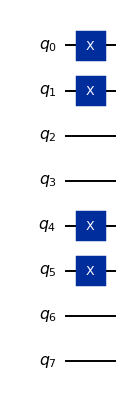

In [3]:
circuit.decompose(reps=2).draw("mpl", scale=0.7)

Finally, we see that the Hartree-Fock state preparation gate simply applies X gates to set the qubits corresponding to occupied orbitals to one.

The Hartree-Fock state is defined as having the lowest numbered orbitals occupied. If we want to produce a different electronic configuration, we can use a more general Slater determinant preparation gate. Let's do this using a configuration obtained from the Hartree-Fock configuration by exciting one of the spin $\alpha$ electrons to the next orbital.

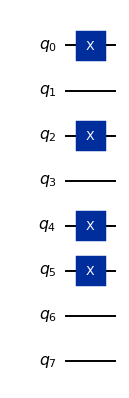

In [4]:
occupied_orbitals = ([0, 2], [0, 1])

circuit = QuantumCircuit(qubits)
circuit.append(ffsim.qiskit.PrepareSlaterDeterminantJW(norb, occupied_orbitals), qubits)

circuit.decompose().draw("mpl", scale=0.7)

A general Slater determinant is obtained by applying an [orbital rotation](orbital-rotation.ipynb) to an electronic configuration. Let's generate a random orbital rotation and use it to initialize the Slater determinant preparation gate, [PrepareSlaterDeterminantJW](../api/ffsim.qiskit.rst#ffsim.qiskit.PrepareSlaterDeterminantJW).

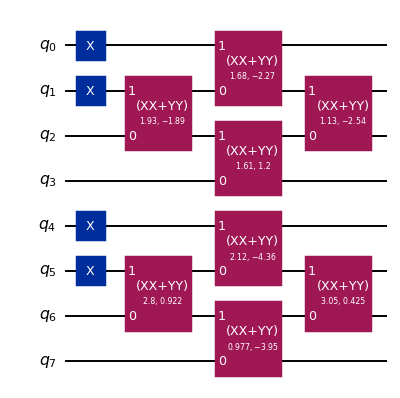

In [5]:
orbital_rotation = ffsim.random.random_unitary(norb, seed=rng)

circuit = QuantumCircuit(qubits)
circuit.append(
    ffsim.qiskit.PrepareSlaterDeterminantJW(
        norb, occupied_orbitals, orbital_rotation=orbital_rotation
    ),
    qubits,
)

circuit.decompose().draw("mpl", scale=0.7)

We see that the Slater determinant is prepared by applying X gates to prepare the Hartree-Fock configuration, and then applying a sequence of [XXPlusYYGates](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.XXPlusYYGate#xxplusyygate) to effect the orbital rotation. Note that the initial X gates prepare the Hartree-Fock configuration even though we specified a different one in the gate initialization. This happens because the Slater determinant gate decomposition is optimized to minimize the number of XXPlusYYGates in the result. The decomposition is more efficient than that of a general orbital rotation. The pattern of XXPlusYYGates requires only linear qubit connectivity.

## Orbital rotation

A general orbital rotation decomposes into a sequence of XXPlusYYGates followed by a layer of [PhaseGates](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.PhaseGate#phasegate). As with the Slater determinant preparation, the pattern of XXPlusYYGates requires only linear qubit connectivity. Let's create a circuit with an [OrbitalRotationJW](../api/ffsim.qiskit.rst#ffsim.qiskit.OrbitalRotationJW) gate and see its decomposition.

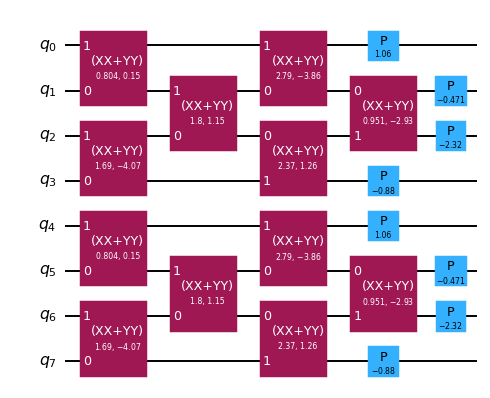

In [6]:
orbital_rotation = ffsim.random.random_unitary(norb, seed=rng)

circuit = QuantumCircuit(qubits)
circuit.append(ffsim.qiskit.OrbitalRotationJW(norb, orbital_rotation), qubits)

circuit.decompose().draw("mpl", scale=0.7)

## Number operator sum evolution

Time evolution by a linear combination of number operators is implemented by the [NumOpSumEvolutionJW](../api/ffsim.qiskit.rst#ffsim.qiskit.NumOpSumEvolutionJW) gate. This gate decomposes into a layer of PhaseGates.

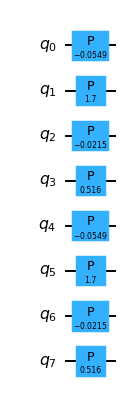

In [7]:
coeffs = rng.standard_normal(norb)

circuit = QuantumCircuit(qubits)
circuit.append(ffsim.qiskit.NumOpSumEvolutionJW(norb, coeffs, time=1.0), qubits)

circuit.decompose().draw("mpl", scale=0.7)

## Diagonal Coulomb evolution

Time evolution by a diagonal Coulomb Hamiltonian is implemented by the [DiagCoulombEvolutionJW](../api/ffsim.qiskit.rst#ffsim.qiskit.DiagCoulombEvolutionJW) gate. This gate decomposes into a layer of PhaseGates followed by a sequence of [CPhaseGates](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.CPhaseGate#cphasegate).

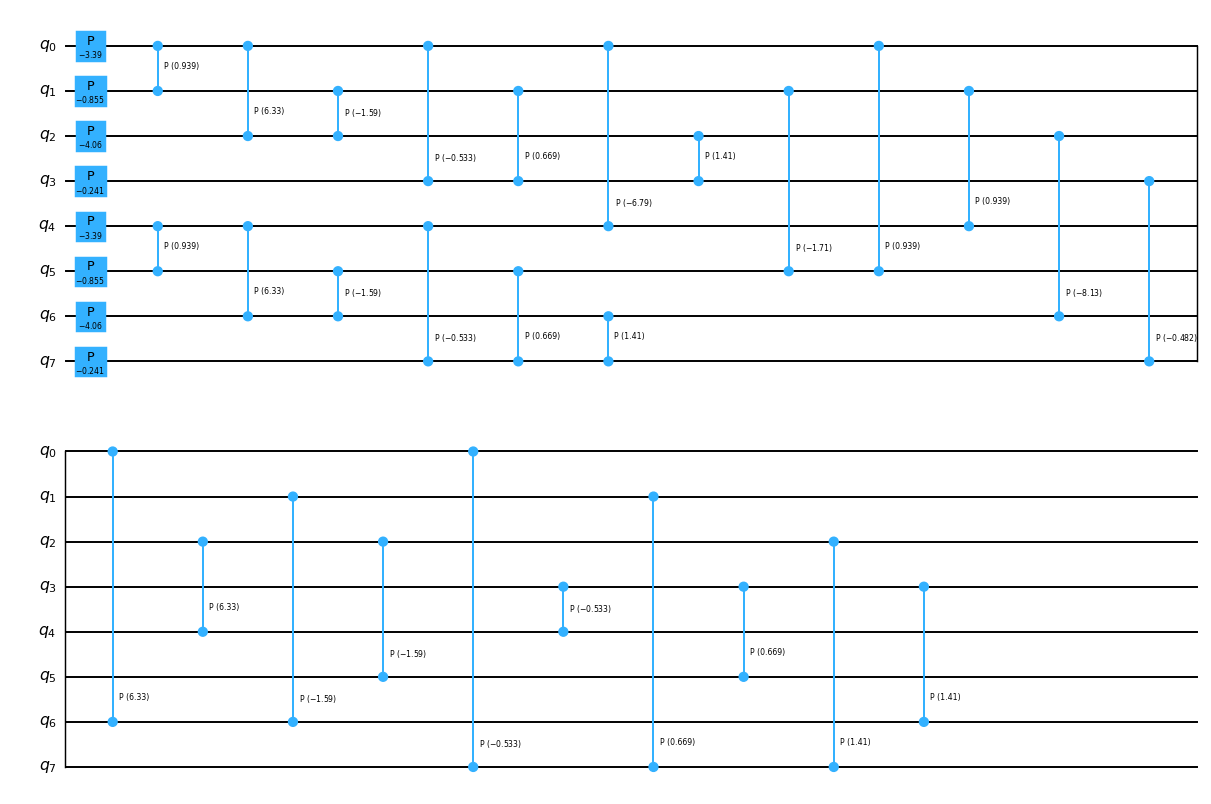

In [8]:
diag_coulomb_mat = ffsim.random.random_real_symmetric_matrix(norb, seed=rng)

circuit = QuantumCircuit(qubits)
circuit.append(
    ffsim.qiskit.DiagCoulombEvolutionJW(norb, diag_coulomb_mat, time=1.0), qubits
)

circuit.decompose().draw("mpl", scale=0.7)

## Trotter simulation of double-factorized Hamiltonian

Trotter simulation of a double-factorized Hamiltonian is implemented by the [SimulateTrotterDoubleFactorizedJW](../api/ffsim.qiskit.rst#ffsim.qiskit.SimulateTrotterDoubleFactorizedJW) gate. This gate decomposes into a sequence of orbital rotations, number operator sum evolutions, and diagonal Coulomb evolutions.

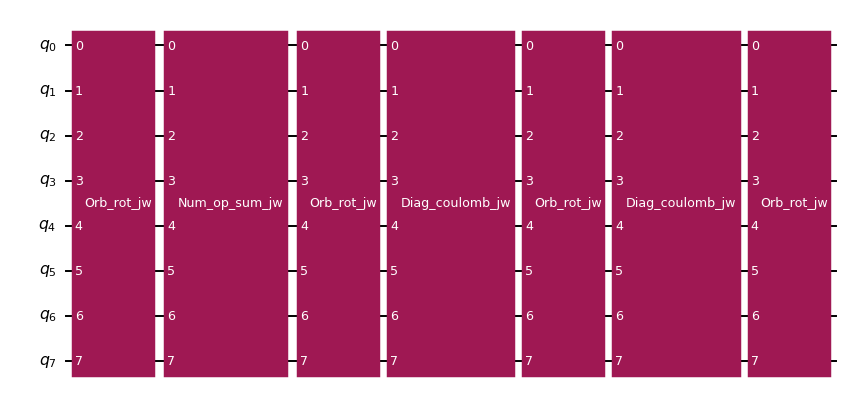

In [9]:
df_hamiltonian = ffsim.random.random_double_factorized_hamiltonian(norb, rank=2)

circuit = QuantumCircuit(qubits)
circuit.append(
    ffsim.qiskit.SimulateTrotterDoubleFactorizedJW(
        df_hamiltonian, time=1.0, n_steps=1, order=0
    ),
    qubits,
)

circuit.decompose().draw("mpl", scale=0.7)

## Unitary cluster Jastrow (UCJ) operator

There are several gate variants for the UCJ operator:

- [UCJOpSpinBalancedJW](../api/ffsim.qiskit.rst#ffsim.qiskit.UCJOpSpinBalancedJW)
- [UCJOpSpinUnbalancedJW](../api/ffsim.qiskit.rst#ffsim.qiskit.UCJOpSpinUnbalancedJW)

All variants decompose into a sequence of diagonal Coulomb evolutions sandwiched by orbital rotations. The number of diagonal Coulomb evolutions is equal to the number of ansatz repetitions (in this example, two).

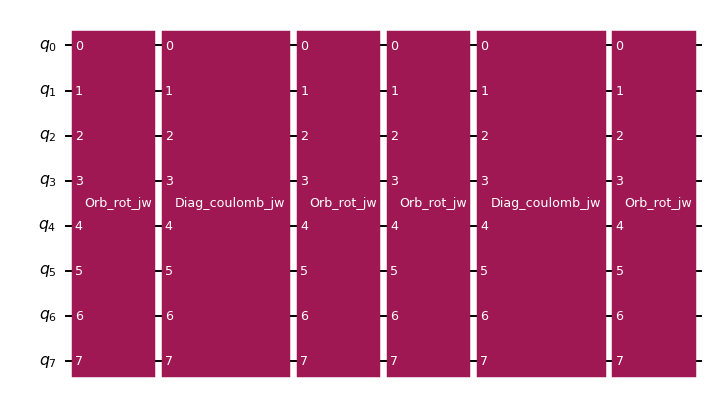

In [10]:
ucj_op = ffsim.random.random_ucj_op_spin_balanced(norb=norb, n_reps=2)

circuit = QuantumCircuit(qubits)
circuit.append(ffsim.qiskit.UCJOpSpinBalancedJW(ucj_op), qubits)

circuit.decompose().draw("mpl", scale=0.7)

### Locality in the UCJ operator

Recall that the UCJ operator decomposes into orbital rotations and diagonal Coulomb evolutions. As explained [previously](#Orbital-rotation), orbital rotations decompose into a pattern of XXPlusYYGates that can be implemented using only linear qubit connectivity. However, the diagonal Coulomb evolutions decompose into a pattern of controlled phase gates which in general require all-to-all connectivity, and their implementation on a limited connectivity qubit device would involve the insertion of swap gates. The following code cell constructs a UCJ operator with a single ansatz repetition, decomposes its diagonal Coulomb evolution, and draws the resulting circuit, showing the high number of controlled phase gates.

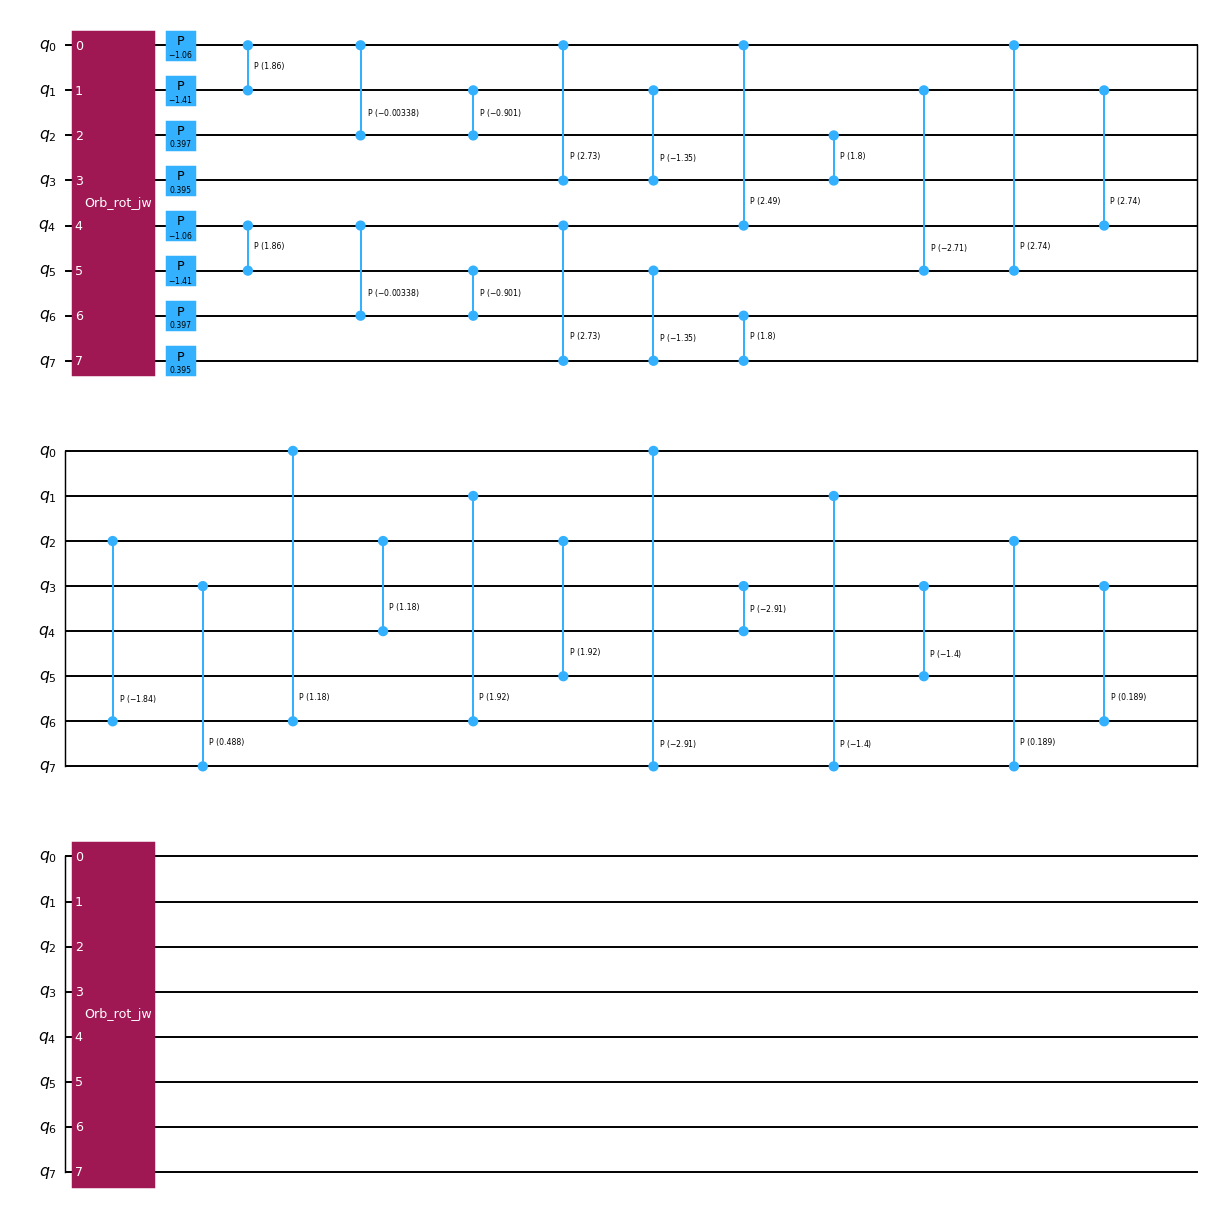

In [11]:
ucj_op = ffsim.random.random_ucj_op_spin_balanced(norb=norb, n_reps=1)

circuit = QuantumCircuit(qubits)
circuit.append(ffsim.qiskit.UCJOpSpinBalancedJW(ucj_op), qubits)

circuit.decompose(["ucj_balanced_jw", "diag_coulomb_jw"], reps=2).draw("mpl", scale=0.7)

The local UCJ (LUCJ) ansatz is more amenable to qubit hardware with limited connectivity. It works by allowing diagonal Coulomb interactions only between certain pairs of orbitals, with the choice of interactions motivated by the connectivity of the target hardware. As explained in [The local unitary cluster Jastrow (LUCJ) ansatz](lucj.ipynb#The-local-UCJ-(LUCJ)-ansatz), if interactions between orbitals of the same spin are restricted to a line topology and interactions between orbitals of opposing spins allowed only within the same spatial orbital, then the diagonal Coulomb interactions can be implemented directly on a square lattice topology without swap gates by mapping the $\alpha$ and $\beta$ orbitals onto adjacent parallel lines. The following code cell shows how to add these restrictions.

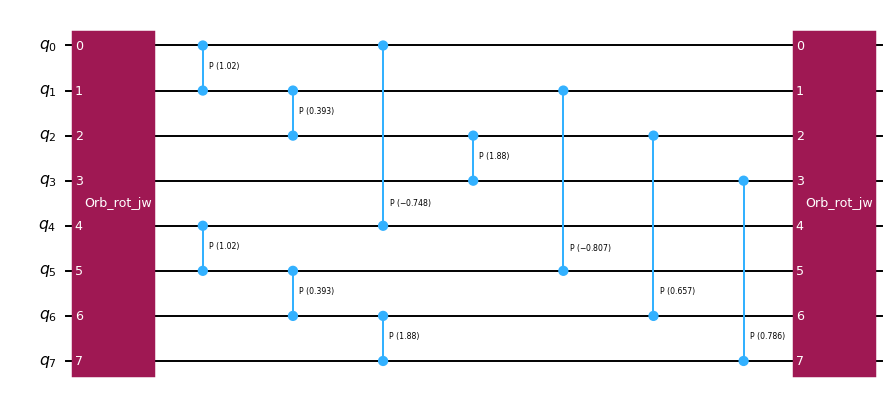

In [12]:
pairs_aa = [(p, p + 1) for p in range(norb - 1)]
pairs_ab = [(p, p) for p in range(norb)]

n_params = ffsim.UCJOpSpinBalanced.n_params(
    norb=norb, n_reps=1, interaction_pairs=(pairs_aa, pairs_ab)
)
ucj_op = ffsim.UCJOpSpinBalanced.from_parameters(
    rng.standard_normal(n_params),
    norb=norb,
    n_reps=1,
    interaction_pairs=(pairs_aa, pairs_ab),
)

circuit = QuantumCircuit(qubits)
circuit.append(ffsim.qiskit.UCJOpSpinBalancedJW(ucj_op), qubits)

circuit.decompose(["ucj_balanced_jw", "diag_coulomb_jw"], reps=2).draw("mpl", scale=0.7)

Now, there are much fewer controlled-phase gates, and the gates that are retained act on neighboring qubits if the orbitals are mapped onto a square lattice as described above.